#### Import the required Python libraries

In [2]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

#### Load dataset & Overview of the dataset

In [8]:
data = "data/upsample.csv"

df = pd.read_csv(data, sep=",")

print(df.shape)

(1620978, 7)


In [9]:
print(df.columns)

Index(['x', 'y', 'z', 'bvp', 'eda', 'hr', 'LABEL'], dtype='object')


In [10]:
df.head()

,x,y,z,bvp,eda,hr,LABEL
0,15.0,18.0,59.0,9.70,0.566581,98.0,0
1,15.0,18.0,59.0,9.15,0.566581,98.0,0
2,15.0,17.0,59.0,8.00,0.566581,98.0,0
3,15.0,17.0,59.0,6.26,0.566581,98.0,0
4,16.0,18.0,60.0,4.11,0.566581,98.0,0


In [11]:
df.tail()

,x,y,z,bvp,eda,hr,LABEL
1620973,66.0,8.0,19.0,-64.26,0.532916,86.67,1
1620974,66.0,8.0,15.0,-57.34,0.532916,86.67,1
1620975,66.0,8.0,15.0,-49.52,0.532916,86.67,1
1620976,65.0,7.0,14.0,-40.73,0.532916,86.67,1
1620977,65.0,7.0,14.0,-30.84,0.532916,86.67,1


In [ ]:
# Dataset type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620978 entries, 0 to 1620977
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1620978 non-null  float64
 1   y       1620978 non-null  float64
 2   z       1620978 non-null  float64
 3   bvp     1620978 non-null  float64
 4   eda     1620978 non-null  float64
 5   hr      1620978 non-null  float64
 6   LABEL   1620978 non-null  float64
dtypes: float64(7)
memory usage: 86.6 MB


In [ ]:
# Dataset statistik
print(df.describe())

                  x             y             z           bvp           eda  \
count  1.620978e+06  1.620978e+06  1.620978e+06  1.620978e+06  1.620978e+06   
mean   1.614891e+01 -5.395366e-01  3.884034e+01  9.526897e-03  2.420867e+00   
std    3.695183e+01  2.305021e+01  2.446318e+01  7.470245e+01  3.288045e+00   
min   -1.280000e+02 -1.280000e+02 -1.280000e+02 -2.649000e+03  0.000000e+00   
25%   -1.000000e+01 -1.400000e+01  2.700000e+01 -1.353000e+01  3.175220e-01   
50%    2.500000e+01 -5.000000e+00  4.700000e+01  3.400000e-01  9.028050e-01   
75%    4.300000e+01  1.100000e+01  5.700000e+01  1.335000e+01  3.741419e+00   
max    1.270000e+02  1.270000e+02  1.270000e+02  2.641500e+03  1.970684e+01   

                 hr         LABEL  
count  1.620978e+06  1.620978e+06  
mean   8.816060e+01  4.745142e-01  
std    1.374844e+01  5.327522e-01  
min    0.000000e+00  0.000000e+00  
25%    7.892000e+01  0.000000e+00  
50%    8.712000e+01  0.000000e+00  
75%    9.540000e+01  1.000000e+00  


In [ ]:
# Check missing value
df.isnull().sum()

x        0
y        0
z        0
bvp      0
eda      0
hr       0
LABEL    0
dtype: int64

#### Univariate analysis

##### Skewness

Skewness adalah ukuran statistik yang menunjukkan seberapa simetris atau miring (kemencengan) distribusi data terhadap nilai rata-rata (mean).

Dalam kata lain:
Skewness menggambarkan apakah data lebih “berat” (memiliki ekor panjang) di sisi kiri atau kanan dari rata-ratanya.
Intuisi Dasar:
- Jika data simetris sempurna (seperti distribusi normal), maka skewness = 0.
- Jika data lebih berat di sisi kanan (ekor panjang di kanan), maka skewness positif (+).
- Jika data lebih berat di sisi kiri (ekor panjang di kiri), maka skewness negatif (–).

| Jenis Skewness             | Bentuk Distribusi | Penjelasan                                                | Contoh Data                                                 |
| -------------------------- | ----------------- | --------------------------------------------------------- | ----------------------------------------------------------- |
| **Skewness = 0**           | Simetris          | Rata-rata, median, dan modus sama                         | Tinggi badan orang dewasa                                   |
| **Skewness > 0 (Positif)** | Miring ke kanan   | Ekor panjang di kanan; sebagian kecil nilai sangat tinggi | Pendapatan (beberapa orang sangat kaya)                     |
| **Skewness < 0 (Negatif)** | Miring ke kiri    | Ekor panjang di kiri; sebagian kecil nilai sangat rendah  | Nilai ujian (kebanyakan tinggi, sedikit yang sangat rendah) |


In [32]:
print(f"x \t: \t{df['x'].skew()}")
print(f"y \t: \t{df['y'].skew()}")
print(f"z \t: \t{df['z'].skew()}")
print(f"bvp \t: \t{df['bvp'].skew()}")
print(f"eda \t: \t{df['eda'].skew()}")
print(f"hr \t: \t{df['hr'].skew()}")

x 	: 	-0.6167121000574813
y 	: 	0.5321338141165213
z 	: 	-1.3498784655550227
bvp 	: 	-0.0550628013649053
eda 	: 	2.4843690199244435
hr 	: 	0.4335545556003288


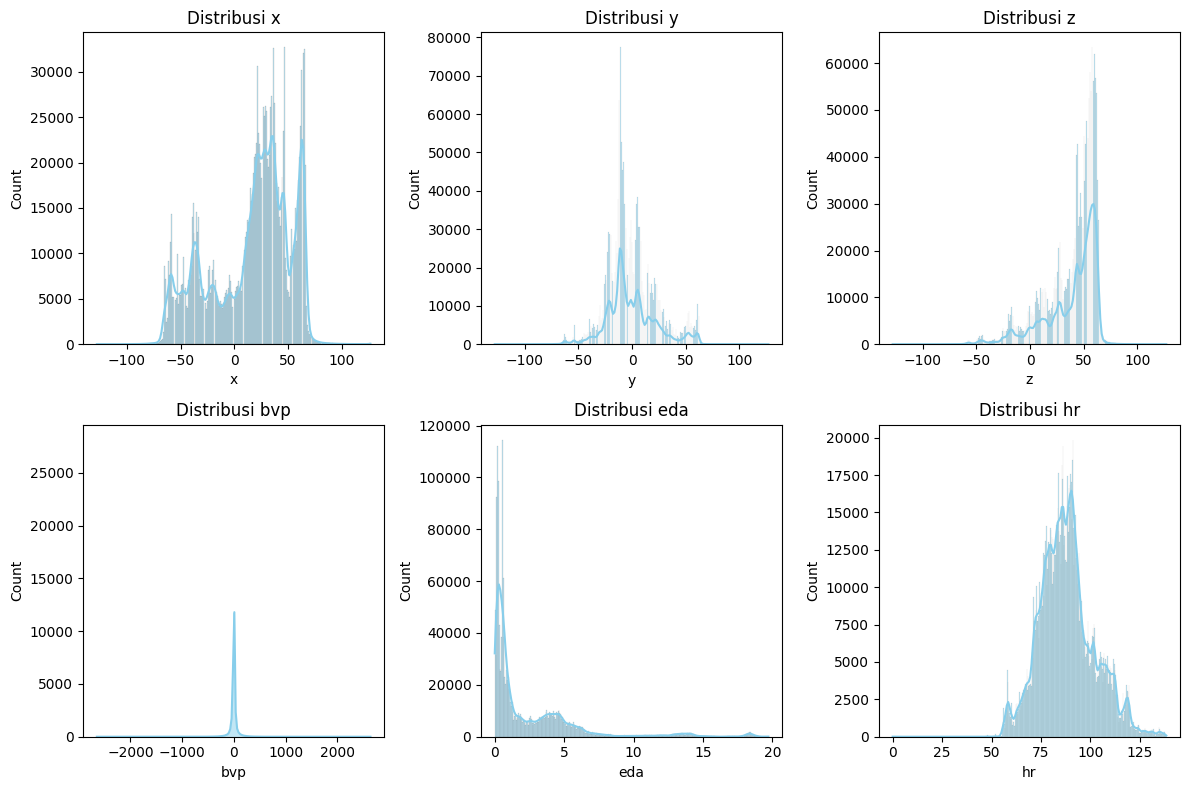

In [28]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns[:6]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

##### Kurtosis

Kurtosis adalah ukuran statistik yang menggambarkan seberapa “runcing” atau “datar” puncak distribusi data dibandingkan dengan distribusi normal.

Dengan kata lain, kurtosis menunjukkan tingkat keruncingan dan ekor distribusi data (seberapa sering terjadi nilai ekstrem atau outlier).

Intuisi Dasar:
Bayangkan kamu punya dua set data yang memiliki mean dan variansi sama, tapi:
- Satu data punya puncak tinggi dan tajam (banyak nilai di sekitar mean, tapi ada beberapa outlier ekstrem),
- Satunya puncaknya datar dan menyebar rata (tidak banyak nilai ekstrem).

Nah, perbedaan bentuk inilah yang diukur oleh kurtosis.

C:\Users\risqi\AppData\Local\Temp\ipykernel_32980\3023757666.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=False, fit=st.norm, color='skyblue')


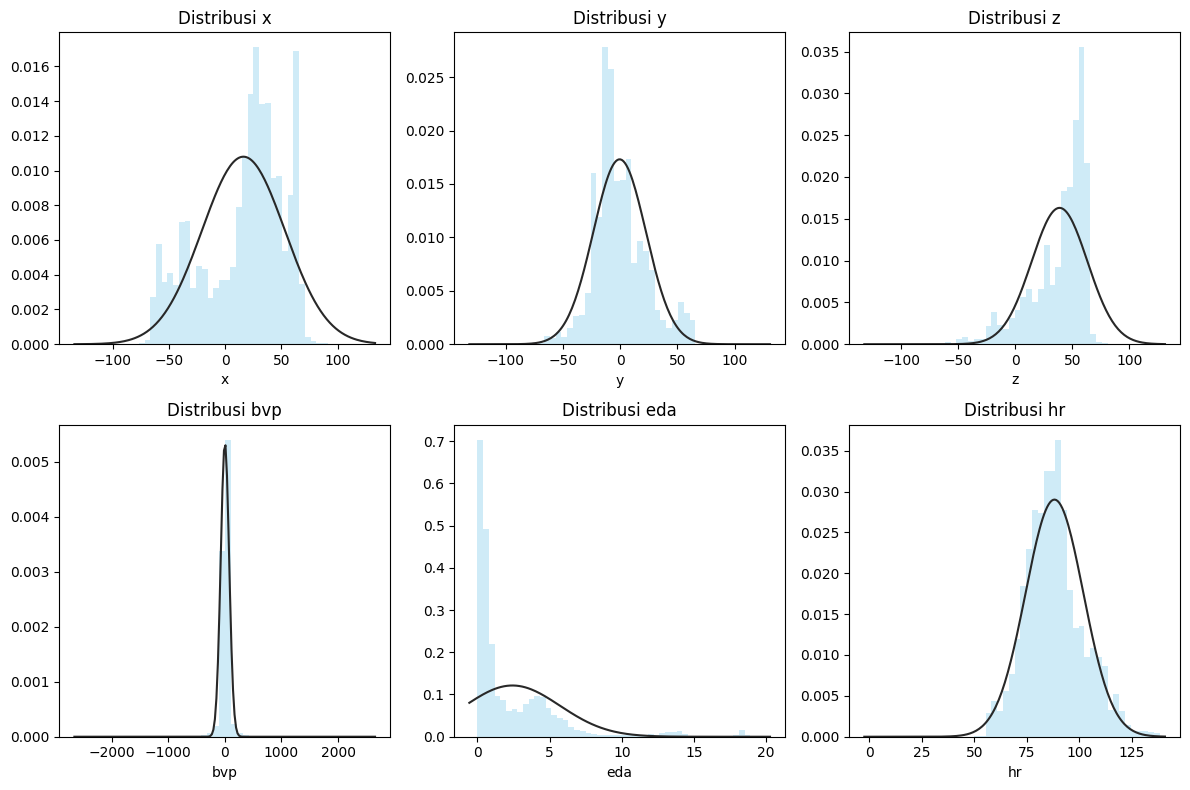

In [33]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns[:6]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.distplot(df[col], kde=False, fit=st.norm, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

C:\Users\risqi\AppData\Local\Temp\ipykernel_32980\3404726037.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=False, fit=st.lognorm, color='skyblue')
c:\Users\risqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
c:\Users\risqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\risqi\AppData\Local\Programs\Python\Python311\Lib\site-pack

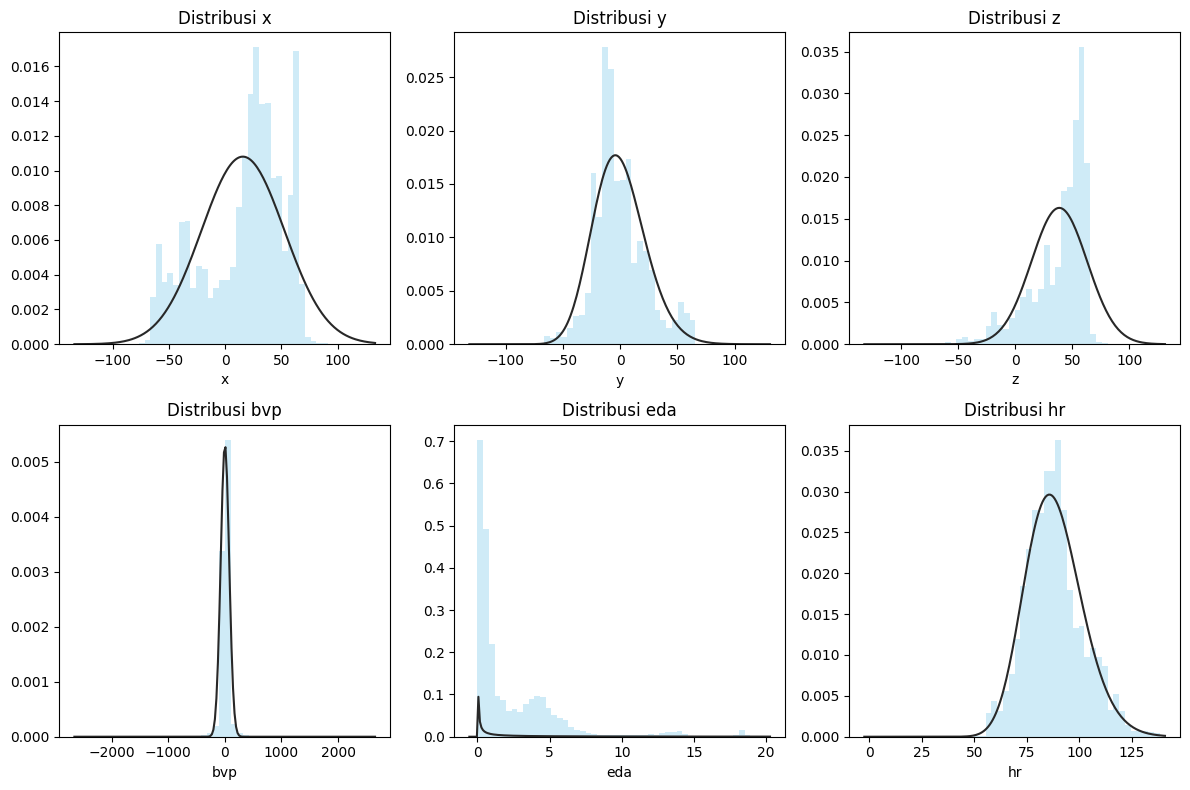

In [30]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns[:6]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.distplot(df[col], kde=False, fit=st.lognorm, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

#### Multivariate analysis

In [39]:
df['LABEL'].value_counts()

LABEL
0.0    879742
1.0    713295
2.0     27941
Name: count, dtype: int64

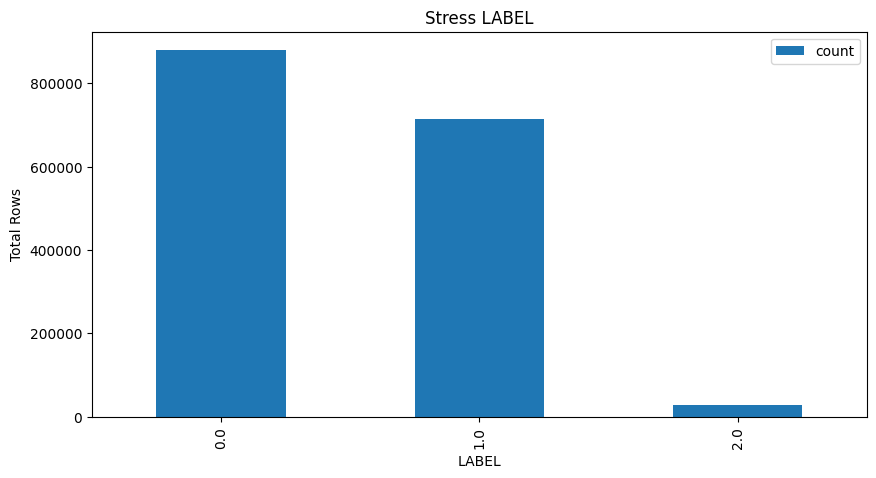

In [38]:
df['LABEL'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Stress LABEL')
plt.xlabel('LABEL')
plt.ylabel('Total Rows')
plt.legend()
plt.show()

In [41]:
correlation = df.corr()

correlation['LABEL'].sort_values(ascending=False)

LABEL    1.000000
x        0.147595
y        0.043085
hr       0.016780
bvp     -0.002325
z       -0.054854
eda     -0.261718
Name: LABEL, dtype: float64

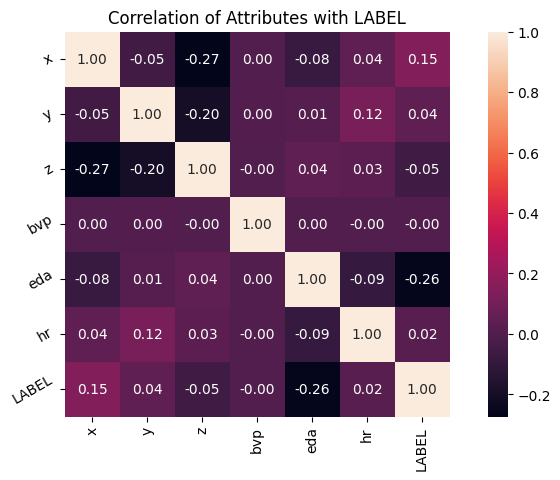

In [43]:
plt.figure(figsize=(10, 5))
plt.title('Correlation of Attributes with LABEL')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()